In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd
import numpy as np
import keras
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from imutils import contours

data = pd.read_csv("data/A_Z Handwritten Data.csv").astype('float32')
#Images
X = data.drop('0', axis = 1)
#Labels
y = data['0']

#Split data randomly into training data and testing data
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2)

#Reshaping the train and test image data from pixel data to 28x28 pixels -
#so we can display it as images. (3D array)
train_x = np.reshape(train_x.values, (train_x.shape[0], 28,28))
test_x = np.reshape(test_x.values, (test_x.shape[0], 28,28))
print("Train data shape: ", train_x.shape)
print("Test data shape: ", test_x.shape)

#------------------------------------------------------------------------------------------

Train data shape:  (297960, 28, 28)
Test data shape:  (74490, 28, 28)


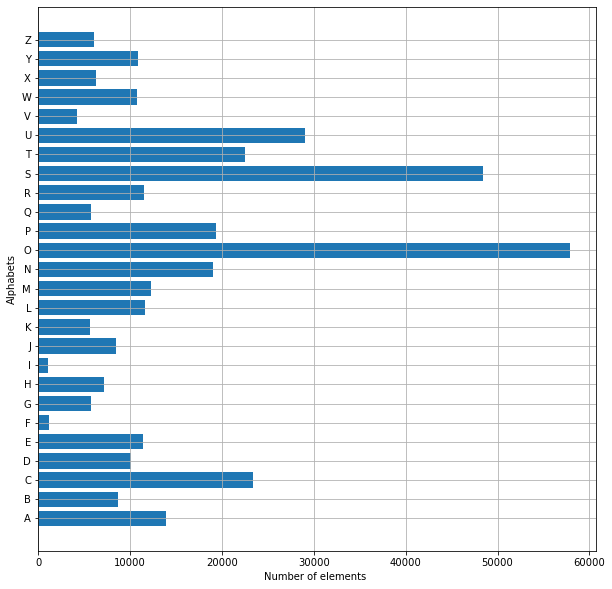

In [2]:
#All the lables (y) are floats, so we cast them to int and map them -
#with the chars in the alphabet
char_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}
y_int = np.int0(y)
#Count how many times each char occurs
char_count = np.zeros(26, dtype='int')
for i in y_int:
    char_count[i] += 1

#List of all chars in alphabet
alphabets = []
for i in char_dict.values():
    alphabets.append(i)

#Show distribution of alphabets
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.barh(alphabets, char_count)
plt.xlabel("Number of elements ")
plt.ylabel("Alphabets")
plt.grid()
plt.show()

#-------------------------------------------------------------------------------------------

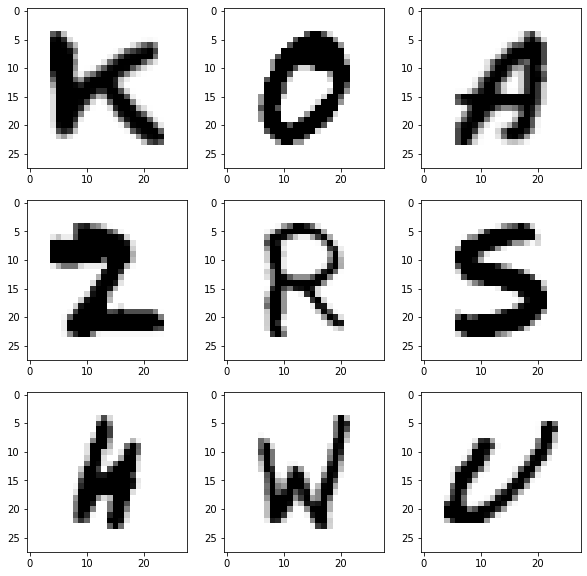

In [3]:
#Shuffle the images in the training data so images are displayed randomly
shuff_img_data = shuffle(train_x[:100])
#Plot 9 images in 3x3 shape so we can see them
fig, ax = plt.subplots(3,3, figsize = (10,10))
axes = ax.flatten()
#Sets the pixel threshold for the images so that they will be displayed similarly
for i in range(9):
    _, shu = cv2.threshold(shuff_img_data[i], 30, 200, cv2.THRESH_BINARY)
#imshow displays each of the image data as images in the 28x28 pixels format
    axes[i].imshow(np.reshape(shuff_img_data[i], (28,28)), cmap="Greys")
plt.show()

#-------------------------------------------------------------------------------------------


In [4]:
#Reshape the training and test data so we can put it in the model
train_X = train_x.reshape(train_x.shape[0],train_x.shape[1],train_x.shape[2],1)
print("New shape of train data: ", train_X.shape)

test_X = test_x.reshape(test_x.shape[0], test_x.shape[1], test_x.shape[2],1)
print("New shape of test data: ", test_X.shape)

#Convert float values to categorical values for each char in alphabet -
# therefore num_classes = 26
#Creates a binary matrix representation of the labels
train_Y = keras.utils.np_utils.to_categorical(train_y, num_classes = 26, dtype='int')
print("New shape of train labels: ", train_Y.shape)

test_Y = keras.utils.np_utils.to_categorical(test_y, num_classes = 26, dtype='int')
print("New shape of test labels: ", test_Y.shape)

New shape of train data:  (297960, 28, 28, 1)
New shape of test data:  (74490, 28, 28, 1)
New shape of train labels:  (297960, 26)
New shape of test labels:  (74490, 26)


In [5]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(pool_size=(2, 2), strides=2))
model.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(keras.layers.MaxPool2D(pool_size=(2, 2), strides=2))
model.add(keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(keras.layers.MaxPool2D(pool_size=(2, 2), strides=2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64,activation ="relu"))
model.add(keras.layers.Dense(128,activation ="relu"))
model.add(keras.layers.Dense(26,activation ="softmax"))

#----------------------------------------------------------------------------------------------------------

model.compile(optimizer = keras.optimizers.adam_v2.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_X, train_Y, epochs=1,  validation_data = (test_X,test_Y))

9312/9312 [==============================] - 165s 18ms/step - loss: 0.1598 - accuracy: 0.9560 - val_loss: 0.0988 - val_accuracy: 0.9745


In [6]:
model.summary()
model.save(r'model_hand.h5')

print("The validation accuracy is :", history.history['val_accuracy'])
print("The training accuracy is :", history.history['accuracy'])
print("The validation loss is :", history.history['val_loss'])
print("The training loss is :", history.history['loss'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

(74490, 28, 28, 1)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]


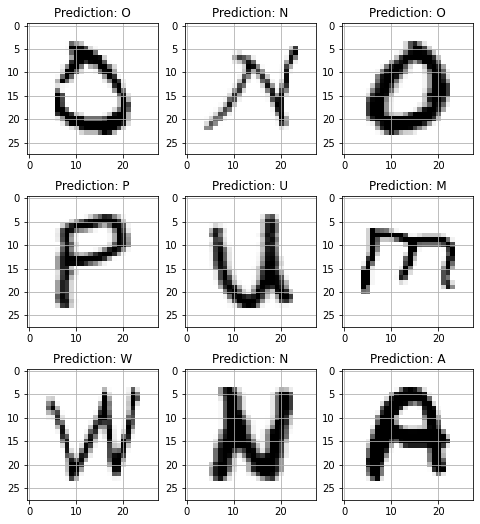

In [7]:
print(test_X.shape)
print(test_Y[2])
#3x3 plot of letters and their predictions
fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()
for i,ax in enumerate(axes):
    #Print each image
    img = np.reshape(test_X[i], (28,28))
    ax.imshow(img, cmap="Greys")
    #Predict the categorical number value of each letter (0-26)
    pred_index = np.argmax(model.predict(test_X[i].reshape(1, 28, 28, 1)))
    #Mapping the categorical number value to the char_dict to find the corresponding letter
    pred = char_dict[pred_index]
    #Alternative and shorter prediction: 
    #pred = char_dict[np.argmax(test_Y[i])]
    ax.set_title("Prediction: " + pred)
    ax.grid()

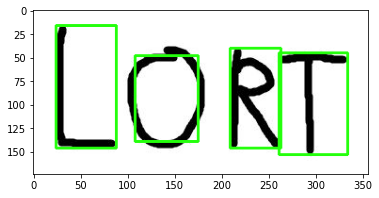

In [14]:


ext_img = cv2.imread('data/LORT.jpg')
ext_img_copy = ext_img.copy()

#ext_img = cv2.cvtColor(ext_img, cv2.COLOR_BGR2RGB)
#ext_img = cv2.resize(ext_img, (400, 440))

#ext_img_copy = cv2.GaussianBlur(ext_img_copy, (7,7), 0)
#ext_img_gray = cv2.cvtColor(ext_img_copy, cv2.COLOR_BGR2GRAY)
#_, ext_img_thresh = cv2.threshold(ext_img_gray, 100, 255, cv2.THRESH_BINARY_INV)

#ext_img_final = cv2.resize(ext_img_thresh, (28,28))
#ext_img_final = np.reshape(ext_img_final, (1,28,28,1))



#-----------------------------------------------------------------
#Predict ext_image



gray = cv2.cvtColor(ext_img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (3,3), 0)
canny = cv2.Canny(blur, 120, 255, 1)

cnts = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

min_area = 100
image_number = 0
for c in cnts:
    area = cv2.contourArea(c)
    if area > min_area:
        x,y,w,h = cv2.boundingRect(c)
        cv2.rectangle(ext_img, (x, y), (x + w, y + h), (36,255,12), 2)
        ROI = ext_img_copy[y:y+h, x:x+w]
        cv2.imwrite("ROI_{}.png".format(image_number), ROI)
        image_number += 1

plt.imshow(blur)
plt.imshow(canny)
plt.imshow(ext_img)
